In [3]:
import pandas as pd
import numpy as np
%matplotlib inline

In [4]:
df=pd.read_csv('macrodata.csv',index_col=0,parse_dates=True)


In [5]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


<AxesSubplot:>

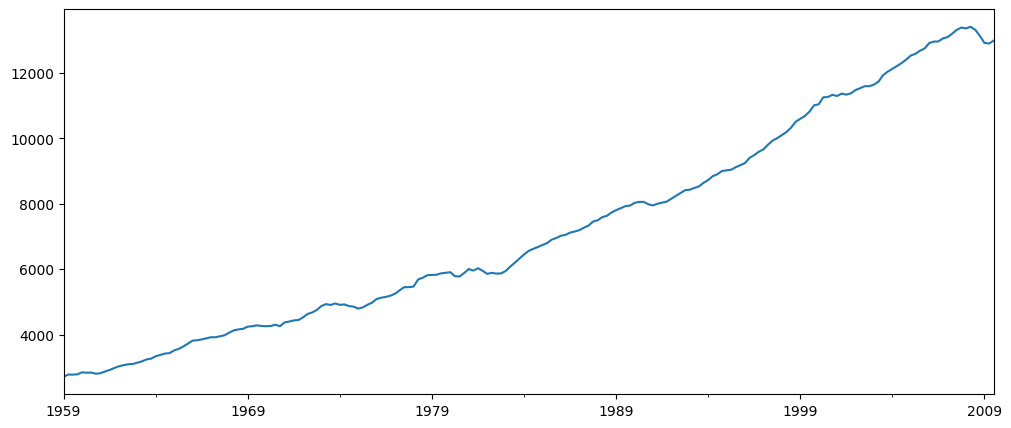

In [6]:
df['realgdp'].plot(figsize=(12,5))

In [7]:
from statsmodels.tsa.filters.hp_filter import hpfilter

In [8]:
gdp_cycle, gdp_trend = hpfilter(df['realgdp'],lamb=1600)

In [9]:
type(gdp_trend)


pandas.core.series.Series

In [10]:
df['trend']=gdp_trend

In [11]:
df.head(5)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint,trend
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00,2670.837085
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74,2698.712468
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09,2726.612545
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06,2754.612067
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19,2782.816333


<AxesSubplot:>

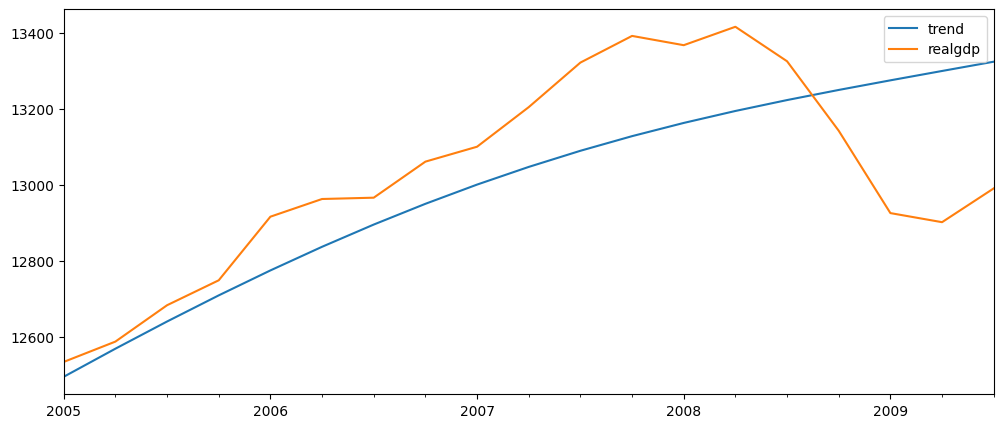

In [12]:
df[['trend','realgdp']]['2005-01-01':].plot(figsize=(12,5))

In [13]:
#2 ETS Decomposition

In [14]:
import pandas as pd
import numpy as np
%matplotlib inline

In [15]:
airline = pd.read_csv('airline_passengers.csv',index_col='Month', parse_dates=True)

In [16]:
airline

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [17]:
airline =airline.dropna()

In [18]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<AxesSubplot:xlabel='Month'>

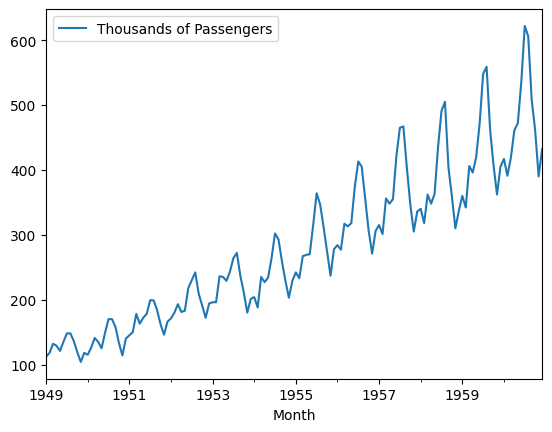

In [19]:
airline.plot()

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [21]:
result =seasonal_decompose(airline['Thousands of Passengers'],model='multiplicative')

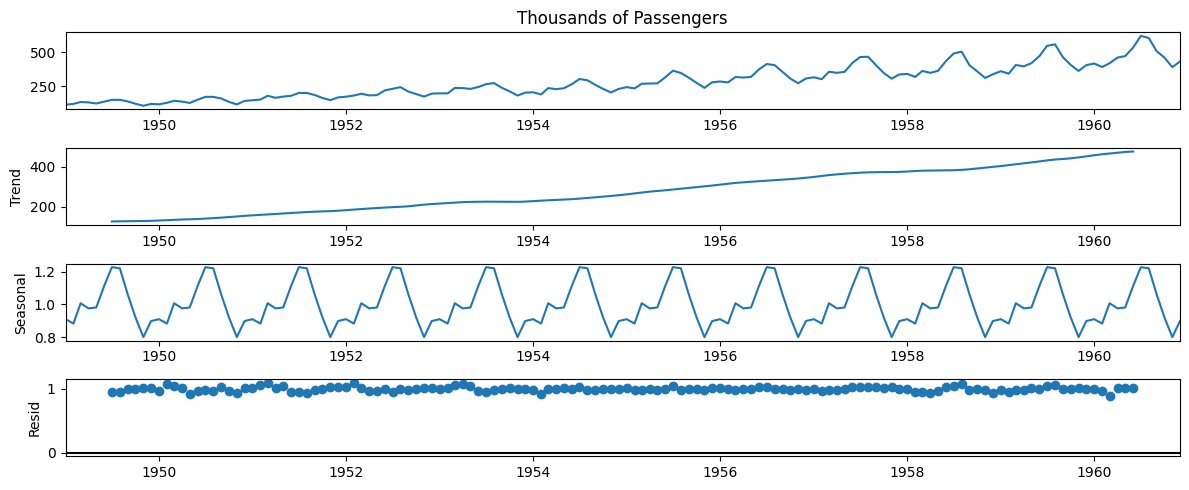

In [22]:
from pylab import rcParams
rcParams['figure.figsize']=12,5

result.plot();


<AxesSubplot:xlabel='Month'>

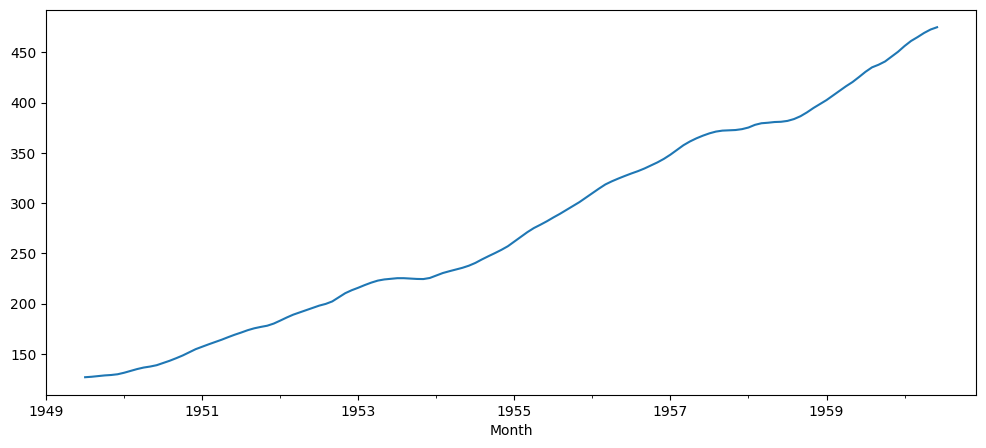

In [23]:
result.trend.plot(figsize=(12,5))

In [24]:
3#EWMA

3

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
airline=pd.read_csv('airline_passengers.csv',index_col='Month')

In [27]:
airline.index

Index(['1949-01', '1949-02', '1949-03', '1949-04', '1949-05', '1949-06',
       '1949-07', '1949-08', '1949-09', '1949-10',
       ...
       '1960-03', '1960-04', '1960-05', '1960-06', '1960-07', '1960-08',
       '1960-09', '1960-10', '1960-11', '1960-12'],
      dtype='object', name='Month', length=144)

In [28]:
#removing missing value
airline.dropna(inplace=True)

In [29]:
airline.index=pd.to_datetime(airline.index)

In [30]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [31]:
airline.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [32]:
airline['6-month-SMA']=airline['Thousands of Passengers'].rolling(window=6).mean()

In [33]:
airline['12-month-SMA']=airline['Thousands of Passengers'].rolling(window=12).mean()

<AxesSubplot:xlabel='Month'>

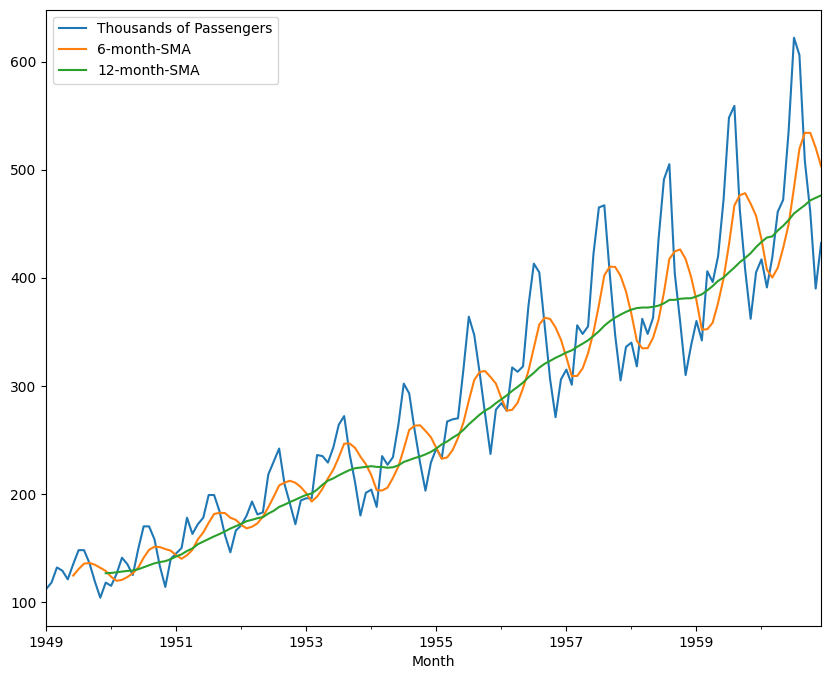

In [34]:
airline.plot(figsize=(10,8))

In [35]:
airline['EWMA-12']=airline['Thousands of Passengers'].ewm(span=12).mean()

<AxesSubplot:xlabel='Month'>

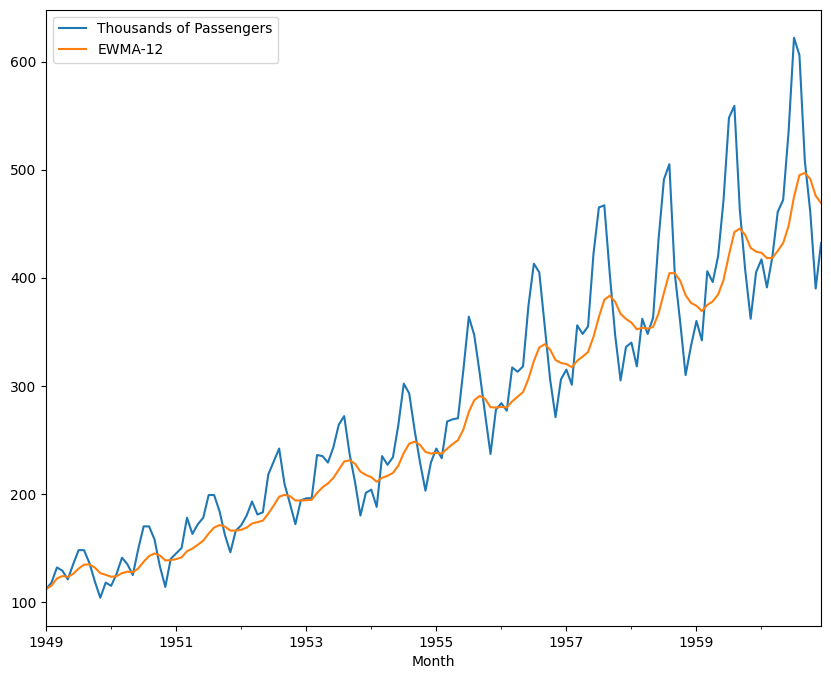

In [36]:
airline[['Thousands of Passengers','EWMA-12']].plot(figsize=(10,8))

In [37]:
4#Holt- Winters Methods Code Along - Part One

4

In [38]:
import numpy as np
import pandas as pd
%matplotlib inline

In [39]:
df =pd.read_csv('airline_passengers.csv',index_col='Month',parse_dates=True)

In [40]:
df=df.dropna()

In [41]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [42]:
df.index.freq = 'MS'

In [43]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [44]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [45]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [46]:
span =12
alpha= 2/(span+1)

In [47]:
df['EWMA12']=df['Thousands of Passengers'].ewm(alpha=alpha,adjust=False).mean()

In [48]:
df.head()

,Thousands of Passengers,EWMA12
Month,,
1949-01-01,112,112.000000
1949-02-01,118,112.923077
1949-03-01,132,115.857988
1949-04-01,129,117.879836
1949-05-01,121,118.359861


In [49]:
model = SimpleExpSmoothing(df['Thousands of Passengers'])

In [50]:
model.fit(smoothing_level=alpha,optimized=False)

In [51]:
fitted_model = model.fit(smoothing_level=alpha,optimized=False)

In [52]:
df['SES12']=fitted_model.fittedvalues.shift(-1)

In [53]:
df.head()

,Thousands of Passengers,EWMA12,SES12
Month,,,
1949-01-01,112,112.000000,112.000000
1949-02-01,118,112.923077,112.923077
1949-03-01,132,115.857988,115.857988
1949-04-01,129,117.879836,117.879836
1949-05-01,121,118.359861,118.359861


In [54]:
5#Holt- Winters Methods Code Along - Part Two

5

In [55]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

<AxesSubplot:xlabel='Month'>

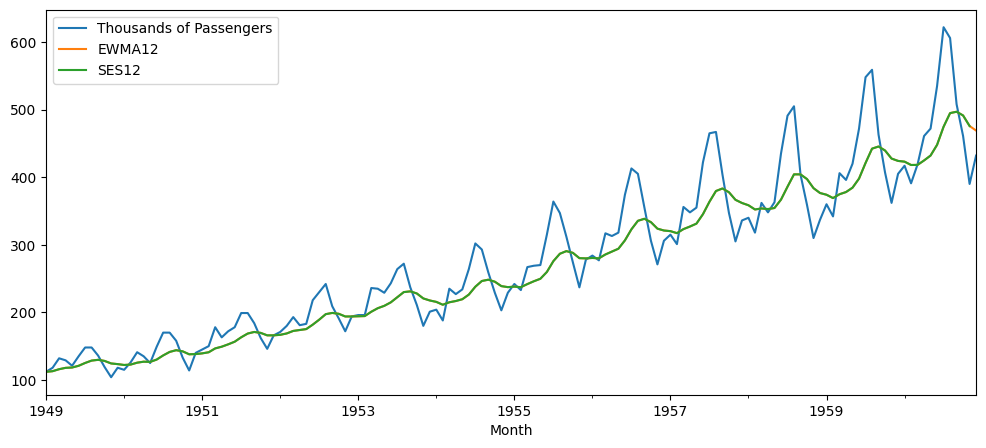

In [56]:
df.plot()

In [58]:
df['DES_add_12']=ExponentialSmoothing(df['Thousands of Passengers'], trend='add').fit().fittedvalues.shift(-1)

In [59]:
df.head()

,Thousands of Passengers,EWMA12,SES12,DES_add_12
Month,,,,
1949-01-01,112,112.000000,112.000000,114.102394
1949-02-01,118,112.923077,112.923077,120.040657
1949-03-01,132,115.857988,115.857988,134.001539
1949-04-01,129,117.879836,117.879836,131.085845
1949-05-01,121,118.359861,118.359861,123.110263


In [60]:
df.columns

Index(['Thousands of Passengers', 'EWMA12', 'SES12', 'DES_add_12'], dtype='object')

<AxesSubplot:xlabel='Month'>

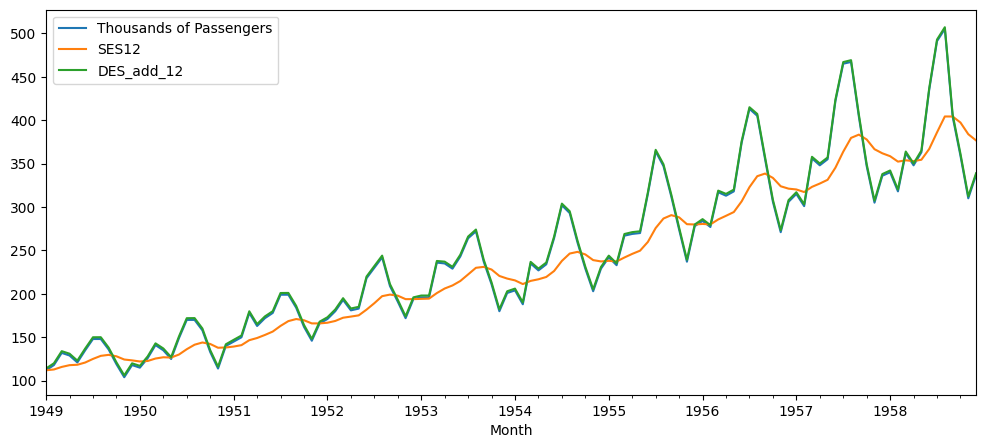

In [65]:
#24 for first 2 years and -24 for last two years data
df[['Thousands of Passengers', 'SES12', 'DES_add_12']].iloc[:24].plot(figsize=(12,5))

In [66]:
#for mul
df['DES_mul_12']=ExponentialSmoothing(df['Thousands of Passengers'], trend='mul').fit().fittedvalues.shift(-1)

In [67]:
df.head()

,Thousands of Passengers,EWMA12,SES12,DES_add_12,DES_mul_12
Month,,,,,
1949-01-01,112,112.000000,112.000000,114.102394,113.990701
1949-02-01,118,112.923077,112.923077,120.040657,120.031669
1949-03-01,132,115.857988,115.857988,134.001539,134.235979
1949-04-01,129,117.879836,117.879836,131.085845,131.270786
1949-05-01,121,118.359861,118.359861,123.110263,123.156267


In [68]:
df.columns

Index(['Thousands of Passengers', 'EWMA12', 'SES12', 'DES_add_12',
       'DES_mul_12'],
      dtype='object')

<AxesSubplot:xlabel='Month'>

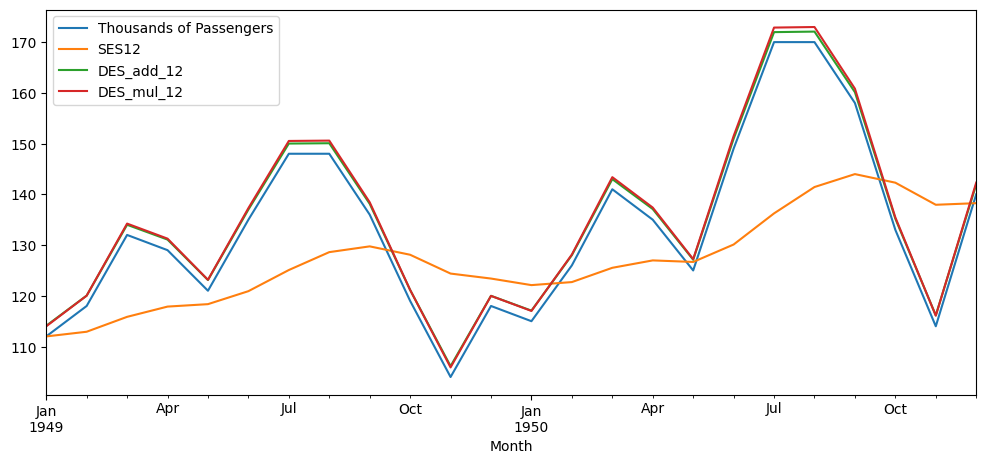

In [72]:
#24 for first 2 years and -24 for last two years data
df[['Thousands of Passengers', 'SES12', 'DES_add_12','DES_mul_12']].iloc[:24].plot(figsize=(12,5))

In [73]:
df['TES_mul_!2']=ExponentialSmoothing(df['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues

C:\Users\SHRI\.conda\envs\tsa_course\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


<AxesSubplot:xlabel='Month'>

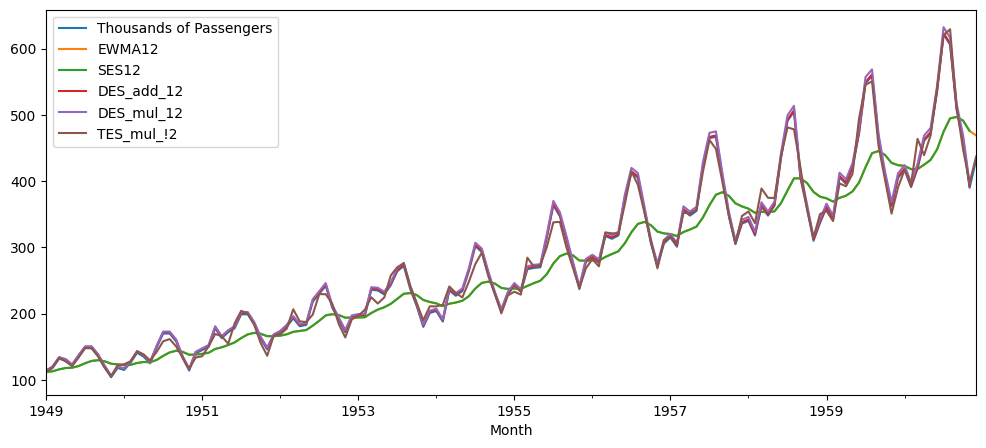

In [74]:
df.plot()

In [75]:
df.columns

Index(['Thousands of Passengers', 'EWMA12', 'SES12', 'DES_add_12',
       'DES_mul_12', 'TES_mul_!2'],
      dtype='object')

<AxesSubplot:xlabel='Month'>

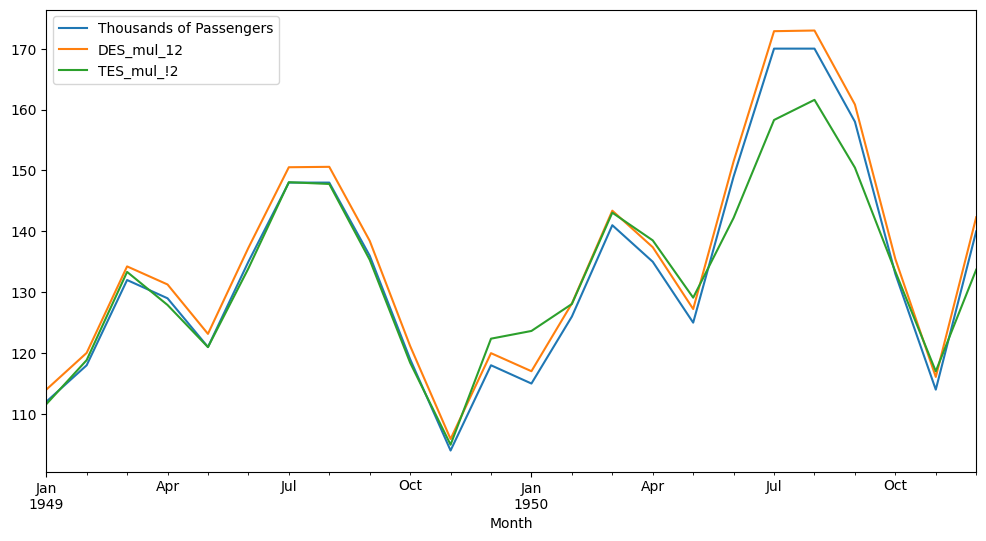

In [78]:
df[['Thousands of Passengers','DES_mul_12', 'TES_mul_!2']].iloc[:24].plot(figsize=(12,6))